AIM:- Implementation of Logistic and Multivariate Regression (A linear regression model that involves multiple independent variables (features) to predict a single dependent variable. ).

1. Implement Logistic Regression on Cancer dataset and print the confusion matrix.

In [1]:
import pandas as pd

In [2]:
# Data Collection
df = pd.read_csv("..//breast-cancer.csv")
# Display the first few rows of the dataset to inspect its structure and content.
print("First 5 rows of the Breast_Cancer dataset:-\n", df.head())

First 5 rows of the Breast_Cancer dataset:-
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_wo

In [3]:
# Check the dimensions of the dataset (number of rows and columns).
row, col = df.shape
print("No. of rows in the dataset: ", row)
print("No. of column in the dataset: ", col)

No. of rows in the dataset:  569
No. of column in the dataset:  32


In [4]:
# Identify the data types of each column (numeric, categorical, text, etc.).
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          

In [5]:
# Data Preprocessing
# Display the number of missing values in each column
missingValues = df.isnull().sum()
print("Missing values per column:-")
print(missingValues)

Missing values per column:-
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [6]:
# Finding Unique categories of diagnosis column
print("Types of Cancer: ", df['diagnosis'].unique())

Types of Cancer:  ['M' 'B']


In [7]:
# Mapping with integer values
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})
print("Checking Dataset after mapping:-\n", df.head())

Checking Dataset after mapping:-
          id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          0        17.99         10.38          122.80     1001.0   
1    842517          0        20.57         17.77          132.90     1326.0   
2  84300903          0        19.69         21.25          130.00     1203.0   
3  84348301          0        11.42         20.38           77.58      386.1   
4  84358402          0        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  

In [8]:
# Split the dataset into independent and dependent feature
X = df.iloc[:, 1:]  # features
y = df.iloc[:, 1]  # target variable    (diagnosis: 2nd column)

In [9]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets(75% training, 25%testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [12]:
from sklearn.model_selection import GridSearchCV
# GridSearchCV is used to tune the hyperparameters
parameter = {'penalty': ['l2'], 'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50], 'max_iter': [100, 200, 300]}
# Scoring parameters for classification is 'accuracy'
classifier_regressor = GridSearchCV(classifier, param_grid=parameter, scoring='accuracy', cv=5)

In [13]:
classifier_regressor.fit(X_train_scaled, y_train)
print("Best parameters for classifier:\n", classifier_regressor.best_params_)
# Best Score
print("Best Score is: ", classifier_regressor.best_score_)

Best parameters for classifier:
 {'C': 20, 'max_iter': 100, 'penalty': 'l2'}
Best Score is:  1.0


In [14]:
# Make predictions on the scaled test data
y_predict = classifier_regressor.predict(X_test_scaled)

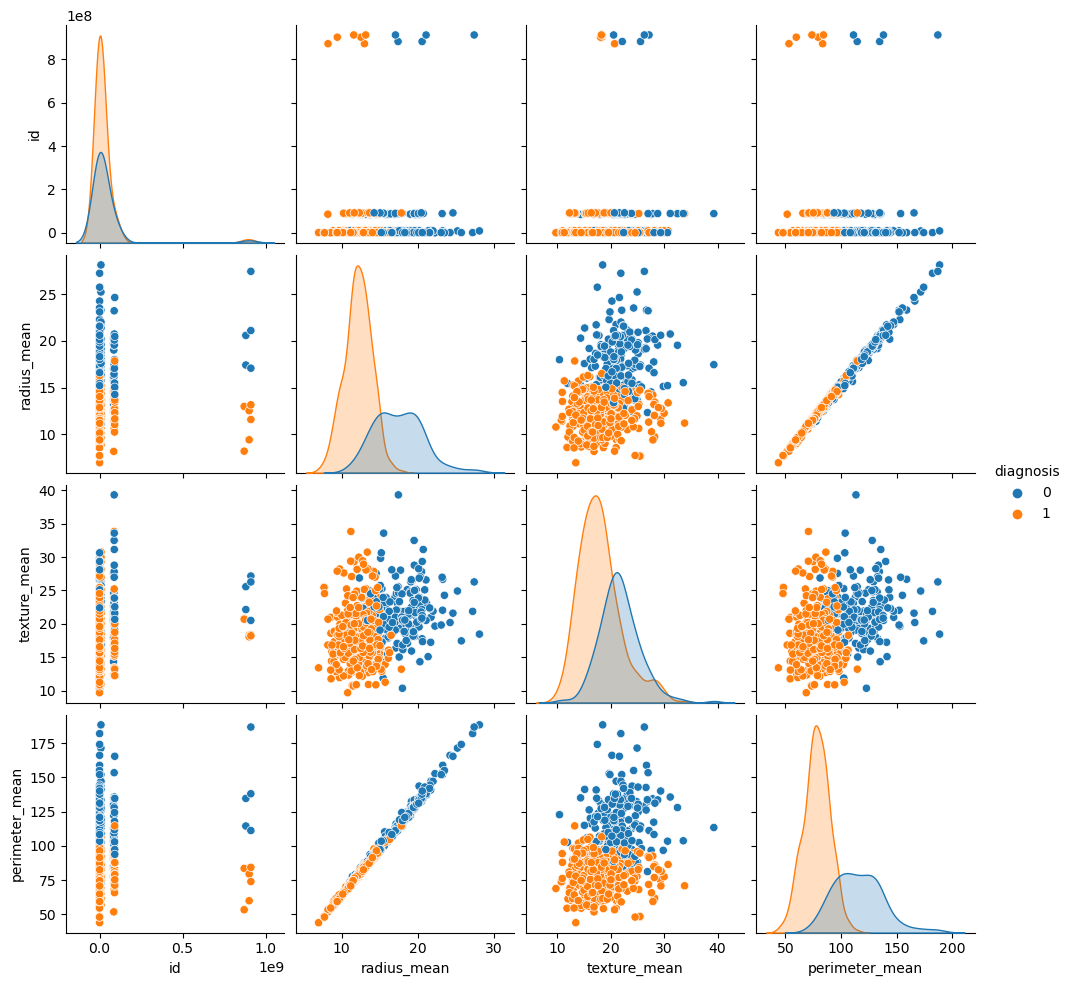

In [15]:
import seaborn as sns
# Create a pair plot to visualize the data
# Taking sample subset of the dataset to avoid intensive computation
df_sample = df.iloc[:, :5]      # (first 5 columns)
sns.pairplot(df_sample, hue='diagnosis')

In [16]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix is:\n", conf_matrix)

Confusion Matrix is:
 [[54  0]
 [ 0 89]]


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        89

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



==================================================================================================================


2. Apply Multivariate regression on Boston Housing Rate Dataset to predict house price
   from the given fourteen independent variables.  

In [18]:
# Loading Boston house Dataset
DF = pd.read_csv("..//Boston.csv")
# Display the first few rows of the dataset to inspect its structure and content.
print("First 5 rows of the Boston House dataset:-\n", DF.head())

First 5 rows of the Boston House dataset:-
       crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


Attribute Information
Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) Black: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]

Each record in the database describes a Boston suburb or town.

In [19]:
# Check the dimensions of the dataset (number of rows and columns).
print("Dimension of the dataset: ", DF.shape)

Dimension of the dataset:  (506, 14)


In [20]:
# information about the dataset
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [21]:
# Extract features and target
attribute = DF.drop('medv', axis=1)
target = DF['medv']

In [22]:
# Split the data into training and testing sets
attribute_train, attribute_test, target_train, target_test = train_test_split(attribute, target, test_size=0.2, random_state=42)

In [23]:
# Initialize and fit the StandardScaler
attribute_train_scaled = scaler.fit_transform(attribute_train)
attribute_test_scaled = scaler.transform(attribute_test)

In [24]:
from sklearn.linear_model import LinearRegression
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(attribute_train_scaled, target_train)

LinearRegression()

In [25]:
from sklearn.metrics import mean_squared_error
# Perform cross-validation
cv_predictions = model.predict(attribute_test_scaled)
cv_mse = mean_squared_error(target_test, cv_predictions)
print(f"Cross-Validation Mean Squared Error: {cv_mse:.4f}")

Cross-Validation Mean Squared Error: 24.2911


In [26]:
from sklearn.metrics import r2_score
# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(target_test, cv_predictions)
print(f"R-squared: {r2:.4f}")

R-squared: 0.6688


In [27]:
# Create a DataFrame with actual and predicted values
results_DF = pd.DataFrame({
    'Actual Values': target_test.values,
    'Predicted Values': cv_predictions
})

results_DF.head(10)

,Actual Values,Predicted Values
0,23.6,28.996724
1,32.4,36.025565
2,13.6,14.816944
3,22.8,25.031979
4,16.1,18.769880
5,20.0,23.254429
6,17.8,17.662538
7,14.0,14.341190
8,19.6,23.013207
9,16.8,20.632456


Here the model's Predicted Values are almost matching with that of Actual Values. So the model is not overfitting.

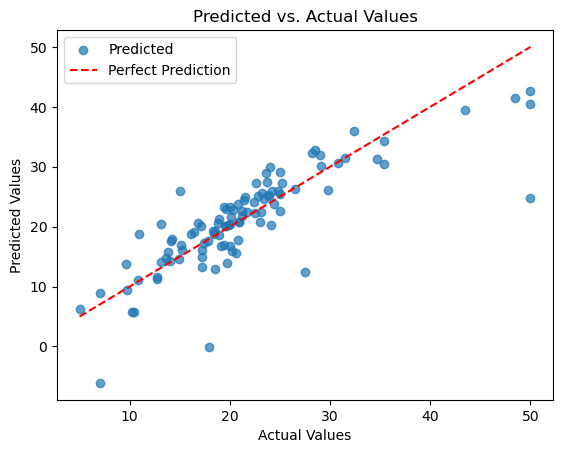

In [28]:
from matplotlib import pyplot as plt
# Plotting the linear regression line
plt.scatter(target_test, cv_predictions, alpha=0.7, label='Predicted')
plt.plot([min(target_test), max(target_test)], [min(target_test), max(target_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

Here, The model is overestimating the actual values.
i.e. the model is predicting higher values than what is actually observed.
as most points are above the perfect prediction line(45 degree line).
This could be due to the model's simplicity or the data's noise.

In [29]:
import numpy as np
# Make predictions on unseen data 
new_data = np.array([[0.02731, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.0900, 1, 296.0, 15.3, 396.90, 4.98]])
new_data_scaled = scaler.transform(new_data)
predicted_value = model.predict(new_data_scaled)
print(f"Predicted Value: {predicted_value[0]:.2f}")

Predicted Value: 29.95


C:\Users\shank\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
